In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
scaler=StandardScaler()
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import classification_report, confusion_matrix, davies_bouldin_score

In [3]:
df=pd.read_csv("files folder\\ANAD.csv")
df

,name,Emotion,pcm_intensity_sma_max,pcm_intensity_sma_min,pcm_intensity_sma_range,pcm_intensity_sma_maxPos,pcm_intensity_sma_minPos,pcm_intensity_sma_amean,pcm_intensity_sma_linregc1,pcm_intensity_sma_linregc2,...,F0env_sma_de_linregerrQ,F0env_sma_de_stddev,F0env_sma_de_skewness,F0env_sma_de_kurtosis,F0env_sma_de_quartile1,F0env_sma_de_quartile2,F0env_sma_de_quartile3,F0env_sma_de_iqr12,F0env_sma_de_iqr23,F0env_sma_de_iqr13
0,V2_1 (1).wav',surprised,0.000002,0,0.000002,39,0,0.0,0.0,0.000000,...,44.290160,6.804174,3.144908,12.621420,-0.208212,0.000000,1.819850,0.208212,1.819850,2.028063
1,V2_1 (2).wav',surprised,0.000002,0,0.000002,38,0,0.0,0.0,0.000000,...,15.284100,4.709333,2.091973,7.180433,-0.068987,0.610156,2.934069,0.679144,2.323913,3.003057
2,V2_1 (3).wav',surprised,0.000002,0,0.000002,38,0,0.0,0.0,0.000000,...,46.801960,7.886595,2.563328,9.669317,-0.837921,0.000000,1.825973,0.837921,1.825973,2.663894
3,V2_1 (4).wav',surprised,0.000002,0,0.000002,38,0,0.0,0.0,0.000000,...,26.651830,5.670303,1.837990,7.500129,0.000000,0.215477,3.138976,0.215477,2.923499,3.138976
4,V2_1 (5).wav',surprised,0.000001,0,0.000001,57,0,0.0,0.0,0.000000,...,16.190310,4.621727,1.855579,5.687108,-0.105829,0.327793,2.982076,0.433622,2.654283,3.087905
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1378,V8_86 (1).wav',happy,0.000002,0,0.000002,14,0,0.0,0.0,0.000001,...,46.330060,7.411534,3.754066,17.230610,-0.711349,0.000000,1.738371,0.711349,1.738371,2.449720
1379,V8_86 (2).wav',happy,0.000002,0,0.000002,37,17,0.0,0.0,0.000000,...,116.327900,11.149410,2.389217,9.741152,-1.214516,0.000000,0.439748,1.214516,0.439748,1.654264
1380,V8_86 (3).wav',happy,0.000002,0,0.000002,30,82,0.0,0.0,0.000000,...,33.875890,6.562593,3.346482,14.282370,-0.747681,0.000000,2.010342,0.747681,2.010342,2.758023
1381,V8_87 (1).wav',happy,0.000002,0,0.000002,39,0,0.0,0.0,0.000000,...,42.019350,6.661080,3.258098,13.402520,0.000000,0.000000,1.703708,0.000000,1.703708,1.703708


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1383 entries, 0 to 1382
Columns: 846 entries, name to F0env_sma_de_iqr13
dtypes: float64(761), int64(83), object(2)
memory usage: 8.9+ MB


In [9]:
print(df['Emotion '].value_counts())
df['Emotion '].unique()

angry        741
happy        505
surprised    137
Name: Emotion , dtype: int64


array(['surprised', 'angry', 'happy'], dtype=object)

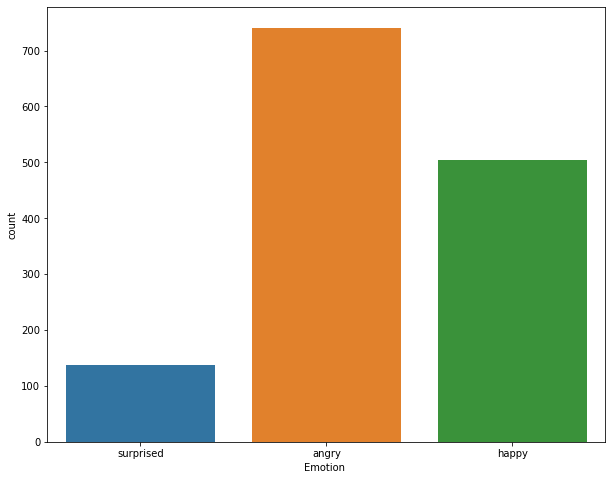

In [6]:
plt.figure(figsize = (10, 8))
sns.countplot(df['Emotion '])
plt.show()

In [10]:
df.isnull().sum()

name                       0
Emotion                    0
pcm_intensity_sma_max      0
pcm_intensity_sma_min      0
pcm_intensity_sma_range    0
                          ..
F0env_sma_de_quartile2     0
F0env_sma_de_quartile3     0
F0env_sma_de_iqr12         0
F0env_sma_de_iqr23         0
F0env_sma_de_iqr13         0
Length: 846, dtype: int64

In [11]:
df.isnull().sum().sum()

0

In [15]:
X = df.drop(['name', 'Emotion '], axis = 1)
y = df['Emotion ']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

In [21]:
l = LogisticRegression()
l.fit(X_train, y_train)
pred = l.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

       angry       0.83      0.89      0.86       215
       happy       0.90      0.86      0.88       160
   surprised       0.56      0.45      0.50        40

    accuracy                           0.84       415
   macro avg       0.77      0.74      0.75       415
weighted avg       0.83      0.84      0.84       415



c:\users\user16\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


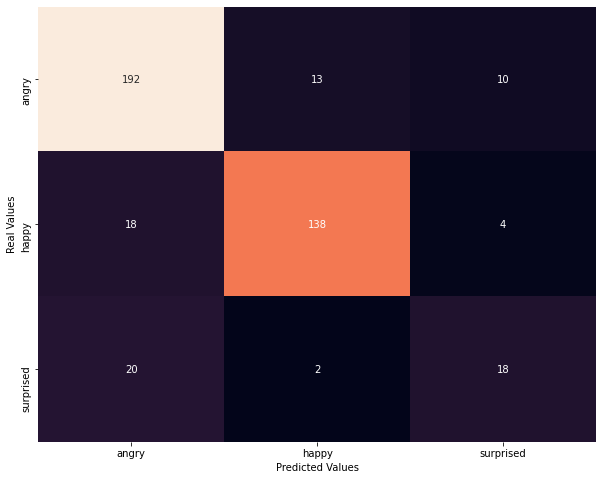

In [29]:
k = ['angry', 'happy', 'surprised']
pdf = pd.DataFrame(confusion_matrix(y_test, pred), index = k , columns = k )
plt.figure(figsize = (10, 8))
sns.heatmap(pdf, annot = True, cbar = False,fmt = 'd')
plt.ylabel('Real Values')
plt.xlabel('Predicted Values')
plt.show()

In [45]:
grid = {'n_estimators': [10, 50, 100, 300]}
p = GridSearchCV(RandomForestClassifier(), grid)
p.fit(X_train, y_train)
p.best_params_

{'n_estimators': 100}

In [46]:
pred_2 = p.predict(X_test)
print(classification_report(y_test, pred_2))

              precision    recall  f1-score   support

       angry       0.90      1.00      0.94       215
       happy       0.99      0.95      0.97       160
   surprised       0.95      0.53      0.68        40

    accuracy                           0.93       415
   macro avg       0.95      0.82      0.86       415
weighted avg       0.94      0.93      0.93       415



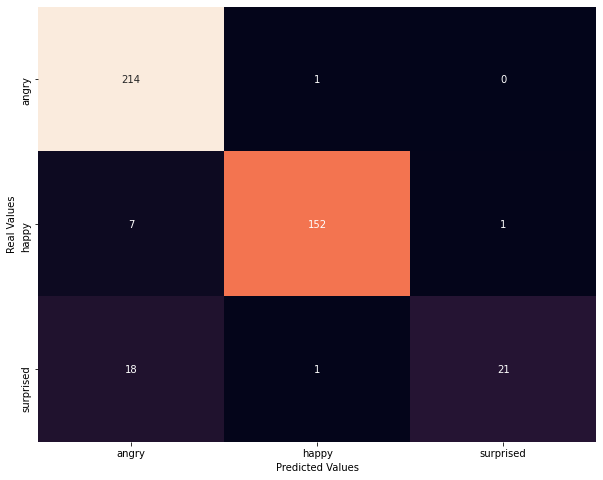

In [47]:
rfc = pd.DataFrame(confusion_matrix(y_test, pred_2), index = k, columns = k)

plt.figure(figsize = (10, 8))
sns.heatmap(rfc, annot = True, cbar = False, fmt = 'd')
plt.ylabel('Real Values')
plt.xlabel('Predicted Values')
plt.show()

We have shown that the emotion can be deducted from our features with a random tree classification and a Logistic regression.In our analyse the random tree classification showed to be slitly more accurate